In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## This is pre-processed MLOC data that is merged

In [ ]:
mloc_orig_df = pd.read_hdf('merged.h5')

In [ ]:
mloc_orig_df.shape

In [ ]:
mloc_orig_df.describe()

Going to keep only relevant columns
- pressure
- relative_humidity
- temperature
- wind_soeed
- Cn2
- label is r0_10T (smoothed over 10 mins)

In [ ]:
 .index

In [ ]:
mloc_reduced_df = mloc_orig_df[['pressure', 'relative_humidity', 'temperature', 'wind_speed','Cn2', 'r0_10T']]

In [ ]:
mloc_reduced_df = mloc_reduced_df.dropna()

In [ ]:
mloc_reduced_df.describe()

In [ ]:
mloc_reduced_df.index

In [ ]:
mask_2019 = (mloc_reduced_df.index >= '2019-01-01') & (mloc_reduced_df.index < '2020-01-01')
mask_2020 = (mloc_reduced_df.index >= '2020-01-01') & (mloc_reduced_df.index < '2021-01-01')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2019,'pressure'], 'r.')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2020,'pressure'], 'r.')

In [ ]:
mask_2019_q1 = (mloc_reduced_df.index >= '2019-01-01') & (mloc_reduced_df.index < '2019-04-01')
mask_2020_q1 = (mloc_reduced_df.index >= '2020-01-01') & (mloc_reduced_df.index < '2020-04-01')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2019_q1,'pressure'], 'r.')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2020_q1,'pressure'], 'r.')
plt.show()

In [ ]:
mask_2019_q1_2020_q1  = mask_2019_q1 | mask_2020_q1

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2019_q1_2020_q1,'pressure'], 'r.')
plt.show()

In [ ]:
mask_2019_w1 = (mloc_reduced_df.index >= '2019-01-01') & (mloc_reduced_df.index < '2019-01-08')
mask_2020_w1 = (mloc_reduced_df.index >= '2020-01-01') & (mloc_reduced_df.index < '2020-01-08')
mask_2019_w1_2020_w1  = mask_2019_w1 | mask_2020_w1
mloc_reduced_df.loc[mask_2019_w1_2020_w1].to_hdf('mloc_testdata_2019w1_2020w1.h5','data')

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2019_w1,'pressure'], 'r.')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(mloc_reduced_df.loc[mask_2020_w1,'pressure'], 'r.')
plt.show()

## Output from extract.py

In [2]:
mloc_extracted_df = pd.read_hdf('mloc.w1.extract.h5')

In [3]:
mloc_extracted_stats_df = mloc_extracted_df.describe()

In [4]:
np.sum(mloc_extracted_stats_df.loc['std'] != 0)

1381

In [11]:
feats = mloc_extracted_stats_df.loc['std',mloc_extracted_stats_df.loc['std'] != 0].index

In [12]:
feats

Index(['pressure__has_duplicate_max', 'pressure__has_duplicate_min',
       'pressure__has_duplicate', 'pressure__sum_values',
       'pressure__abs_energy', 'pressure__mean_abs_change',
       'pressure__mean_change', 'pressure__mean_second_derivative_central',
       'pressure__median', 'pressure__mean',
       ...
       'Cn2__fourier_entropy__bins_5', 'Cn2__fourier_entropy__bins_10',
       'Cn2__fourier_entropy__bins_100',
       'Cn2__permutation_entropy__dimension_3__tau_1',
       'Cn2__permutation_entropy__dimension_4__tau_1',
       'Cn2__permutation_entropy__dimension_5__tau_1',
       'Cn2__permutation_entropy__dimension_6__tau_1',
       'Cn2__permutation_entropy__dimension_7__tau_1',
       'Cn2__mean_n_absolute_max__number_of_maxima_7', 'r0_10T'],
      dtype='object', length=1381)

Can I look at different distributions of columns

In [14]:
mloc_extracted_df[feats].describe()
type(feats)

pandas.core.indexes.base.Index

In [36]:
mloc_extracted_df_cols_randsamp = mloc_extracted_df[feats].sample(n=10,axis='columns')
    

In [38]:
mloc_extracted_df_cols_randsamp.columns

Index(['wind_speed__cwt_coefficients__coeff_5__w_5__widths_(2, 5, 10, 20)',
       'pressure__index_mass_quantile__q_0.6',
       'pressure__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)',
       'temperature__absolute_sum_of_changes',
       'wind_speed__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2',
       'pressure__ratio_beyond_r_sigma__r_2', 'temperature__quantile__q_0.3',
       'temperature__mean_change',
       'relative_humidity__percentage_of_reoccurring_datapoints_to_all_datapoints',
       'relative_humidity__ratio_beyond_r_sigma__r_1.5'],
      dtype='object')

In [39]:
# mloc_extracted_df_cols_randsamp.index

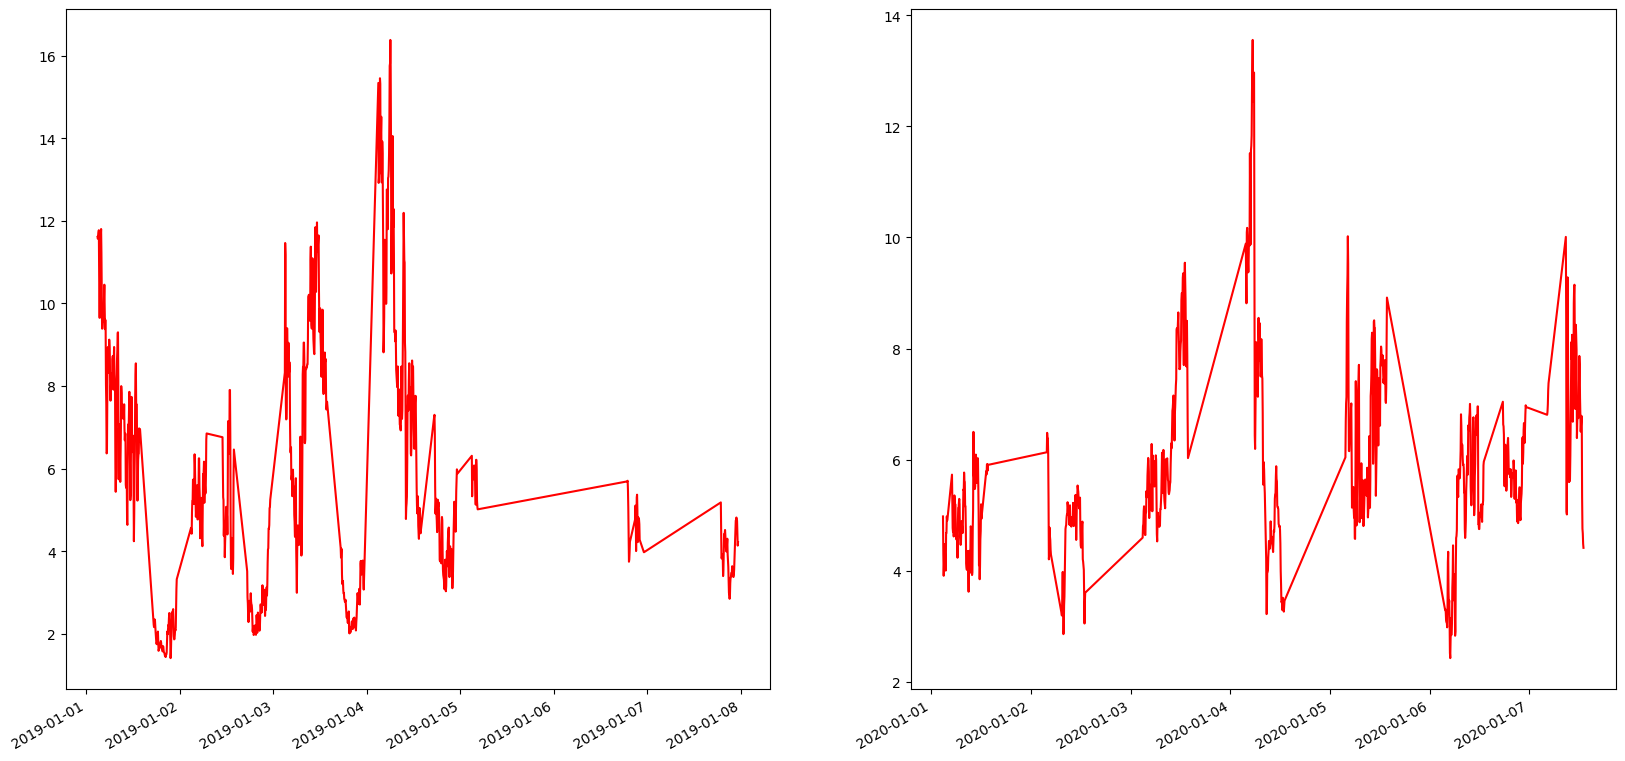

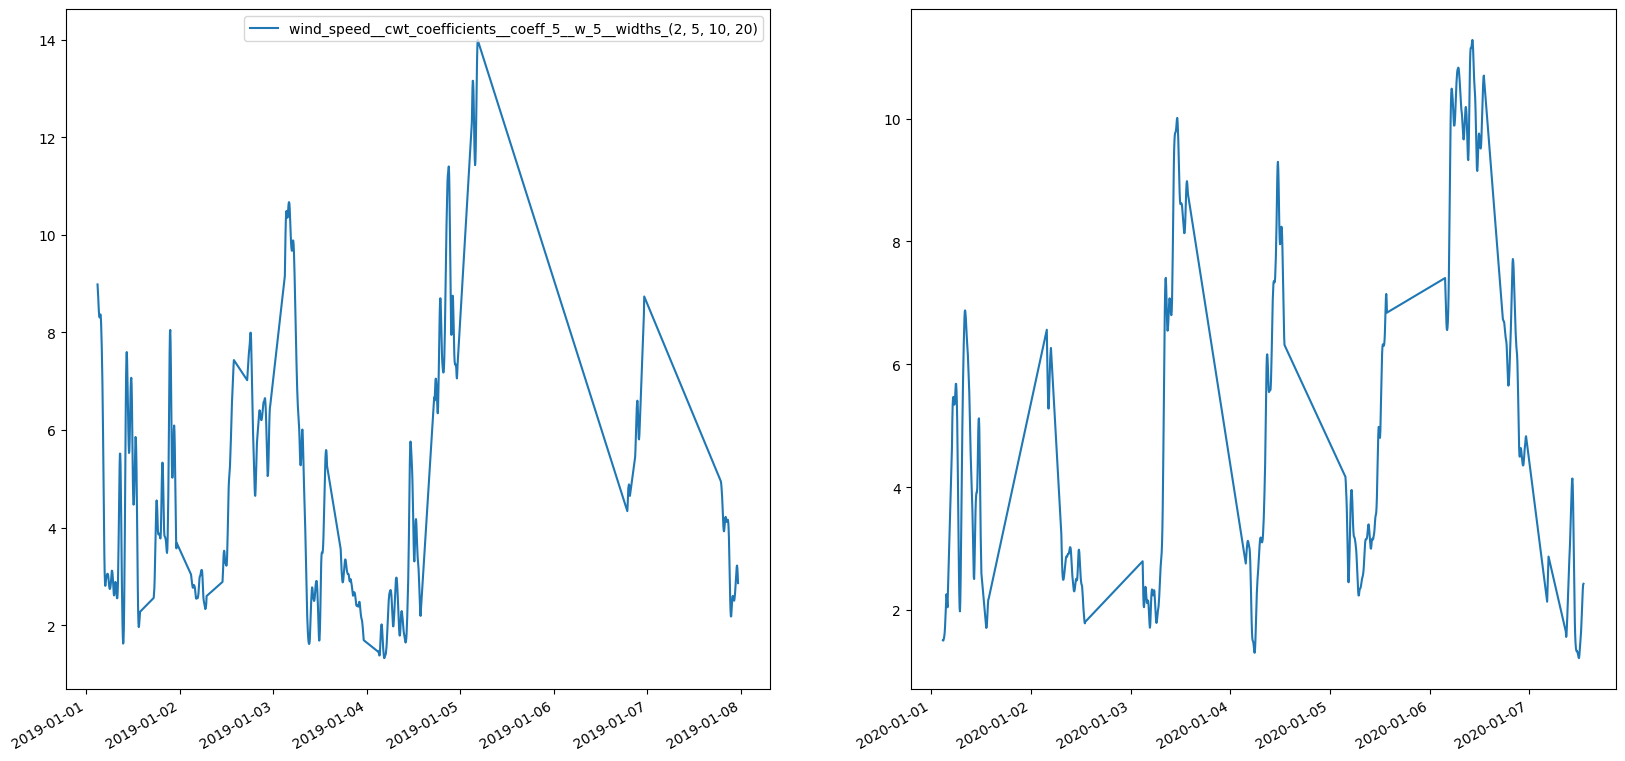

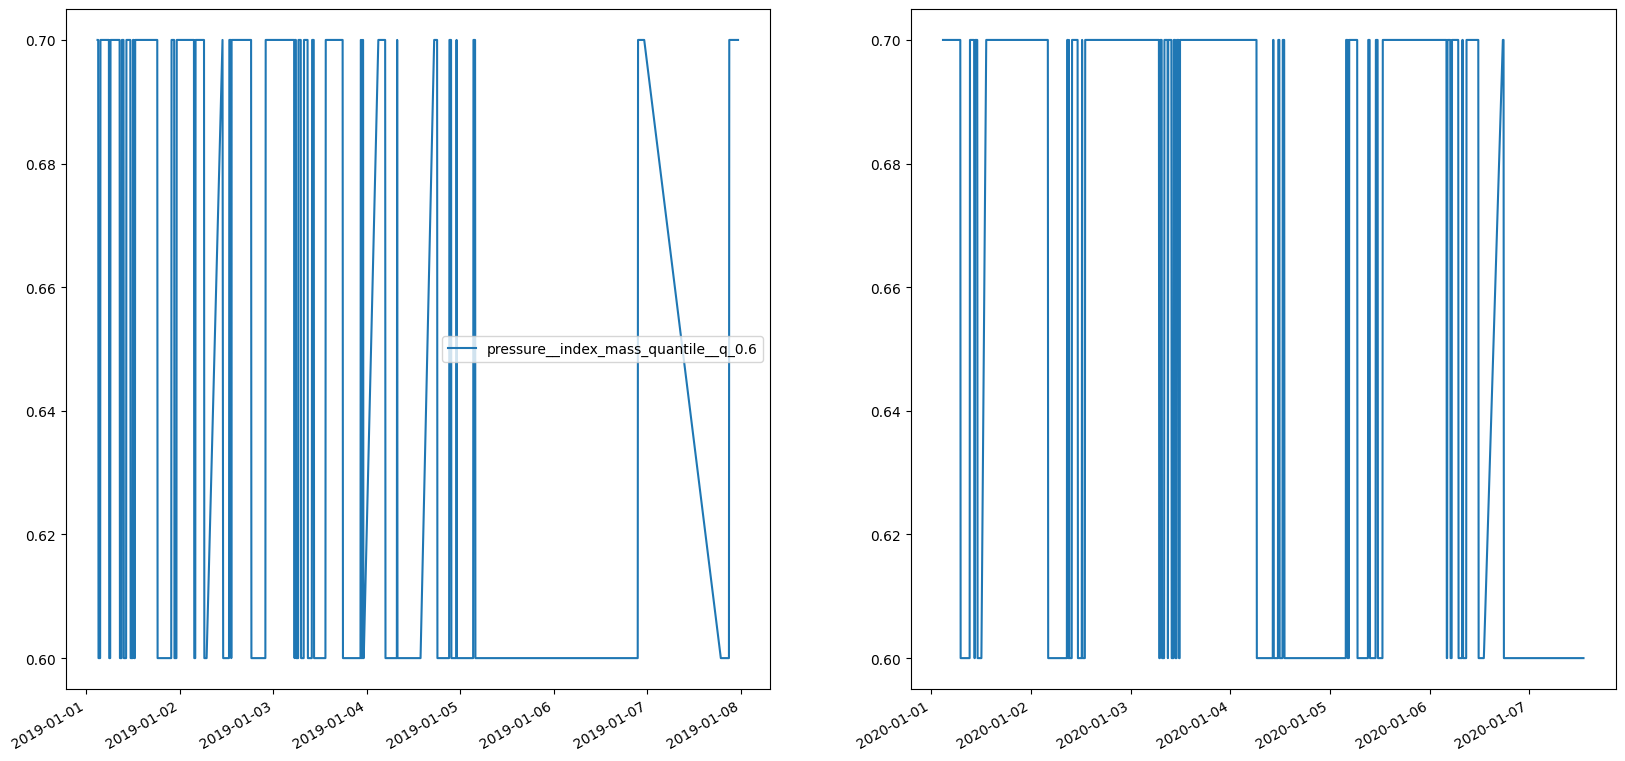

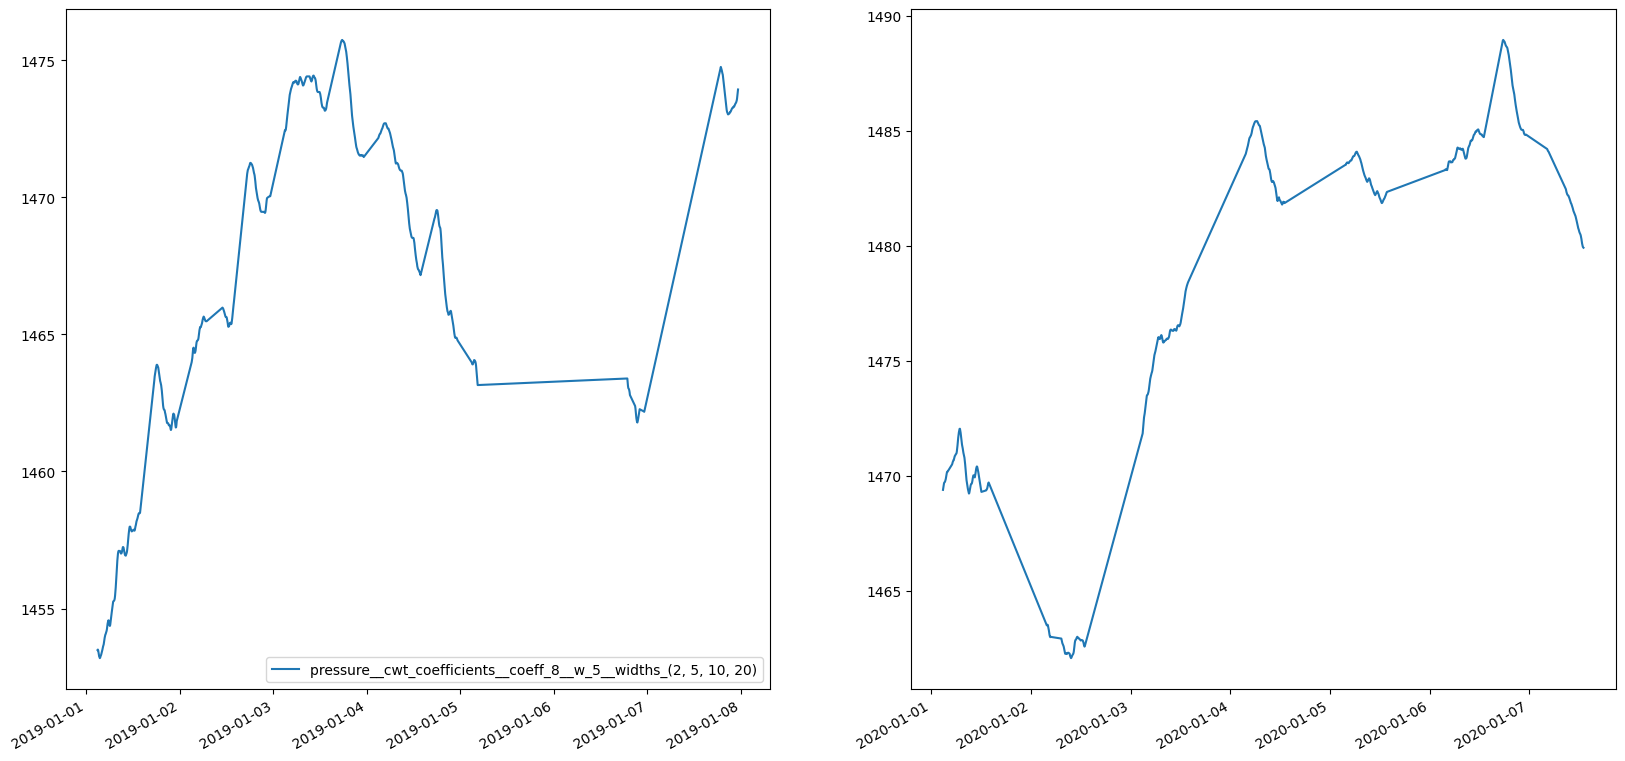

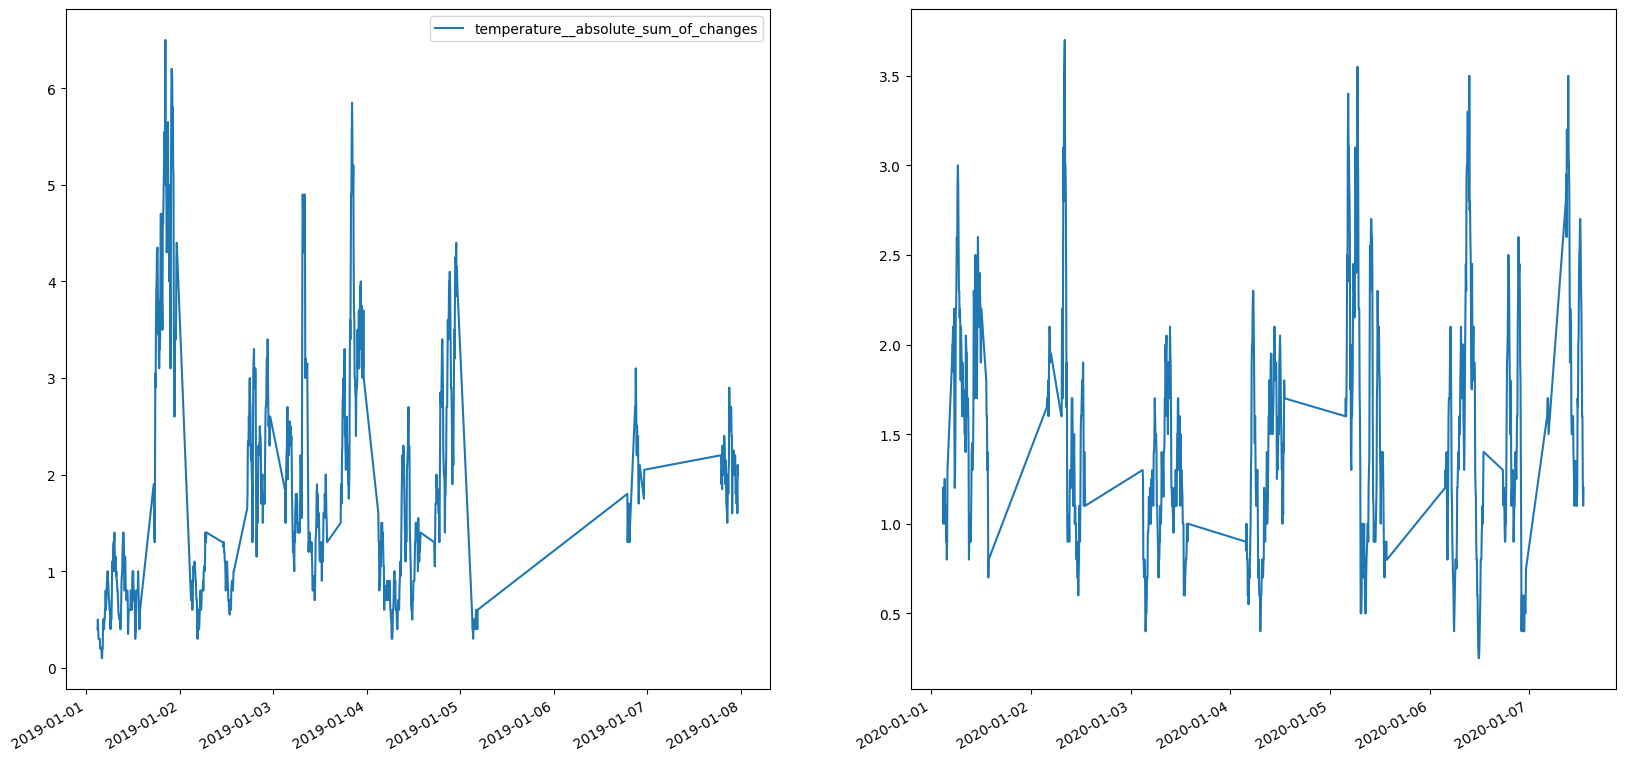

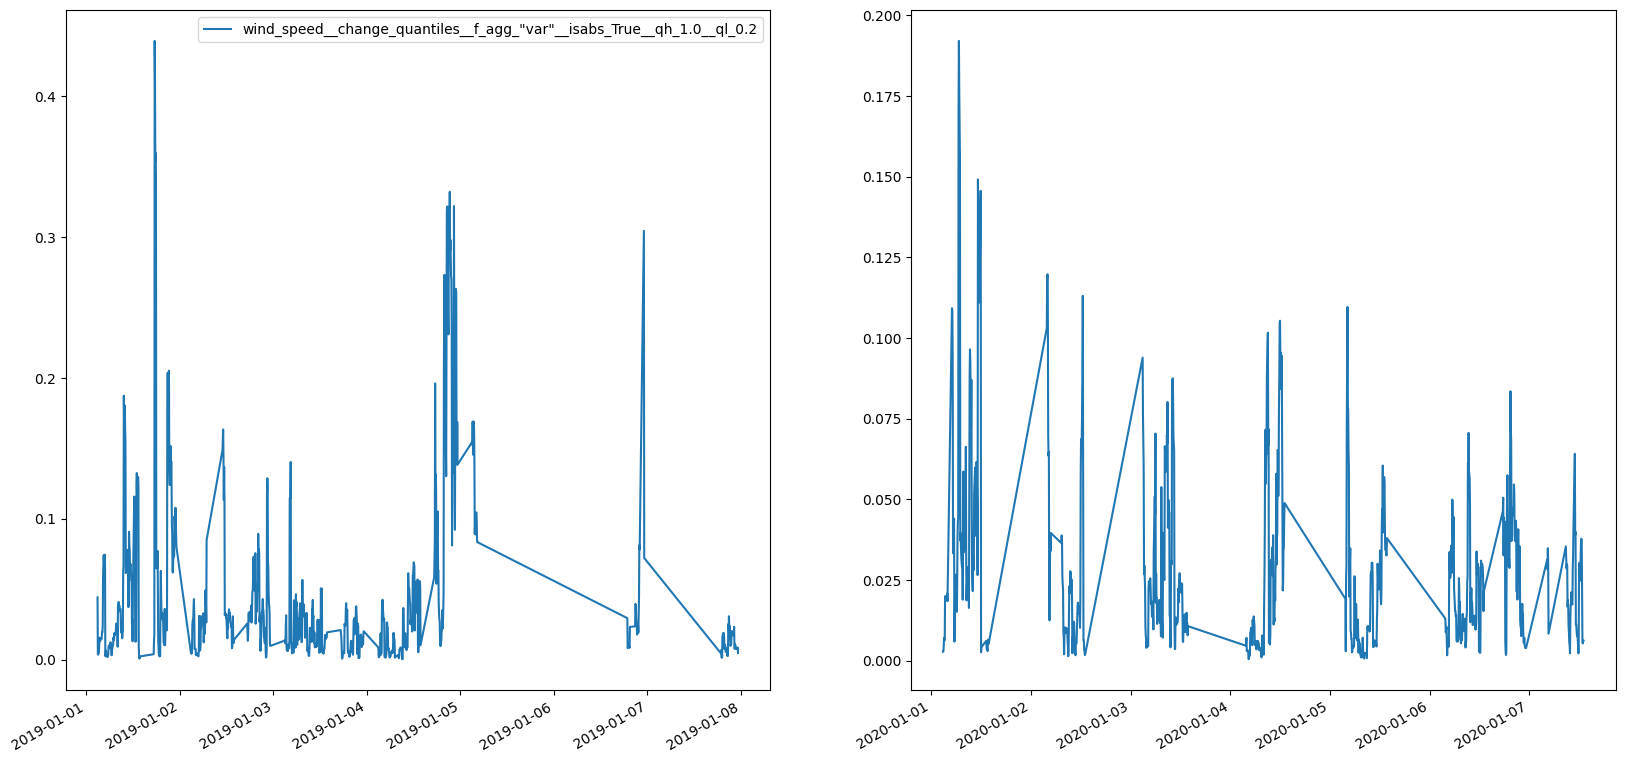

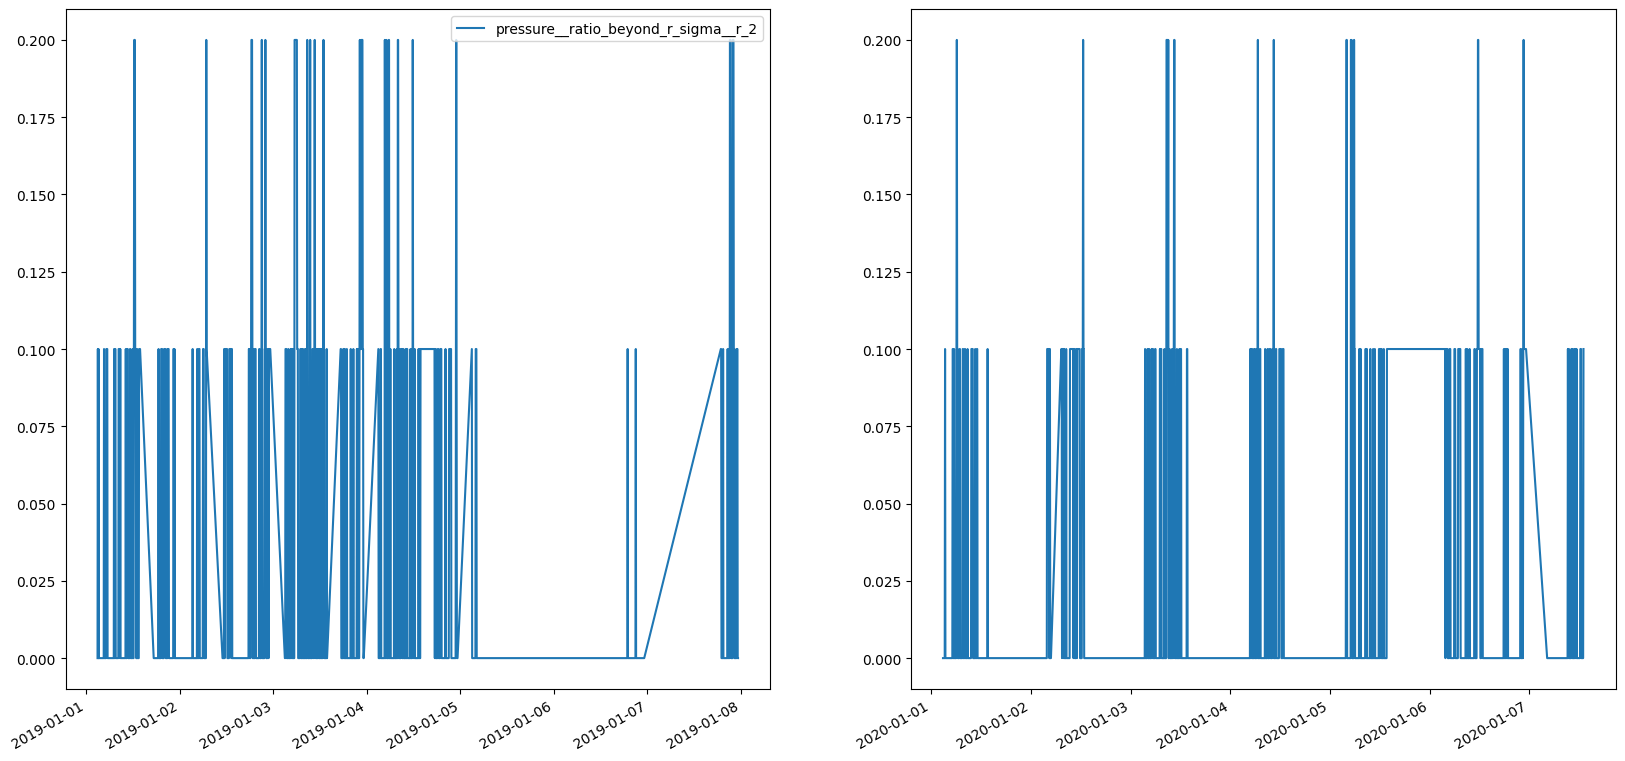

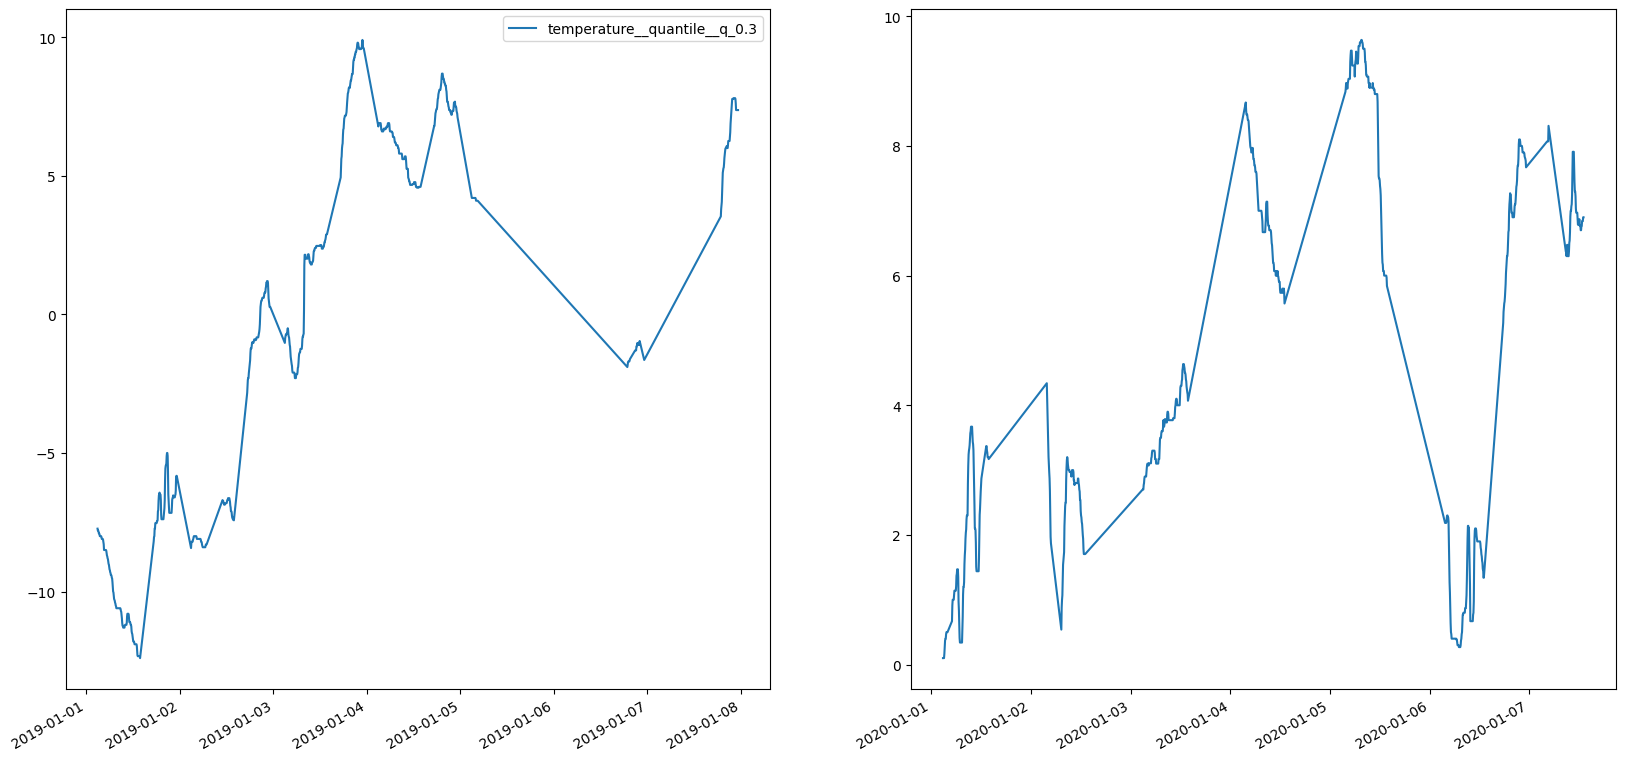

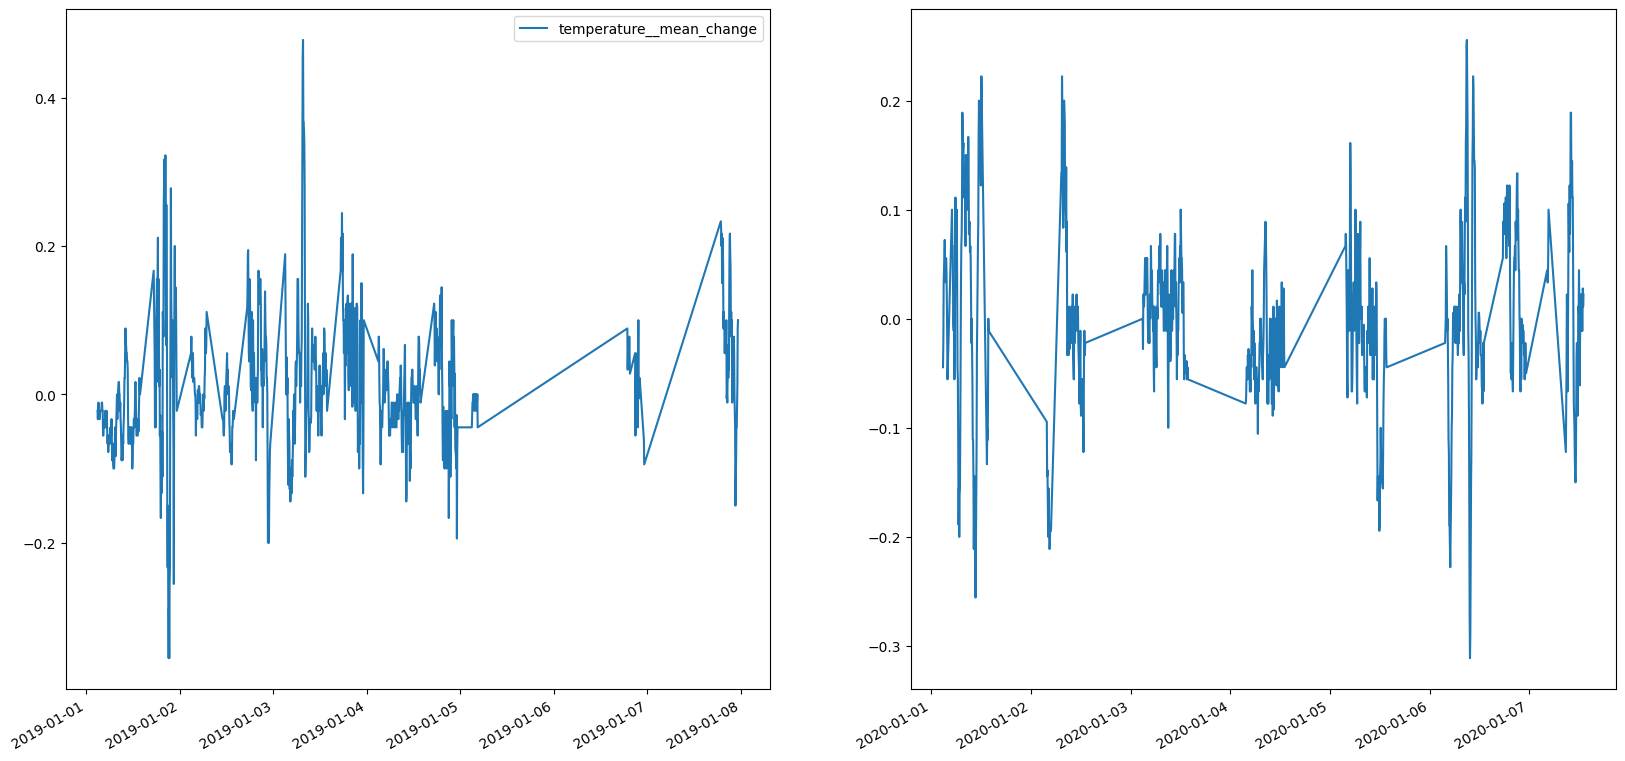

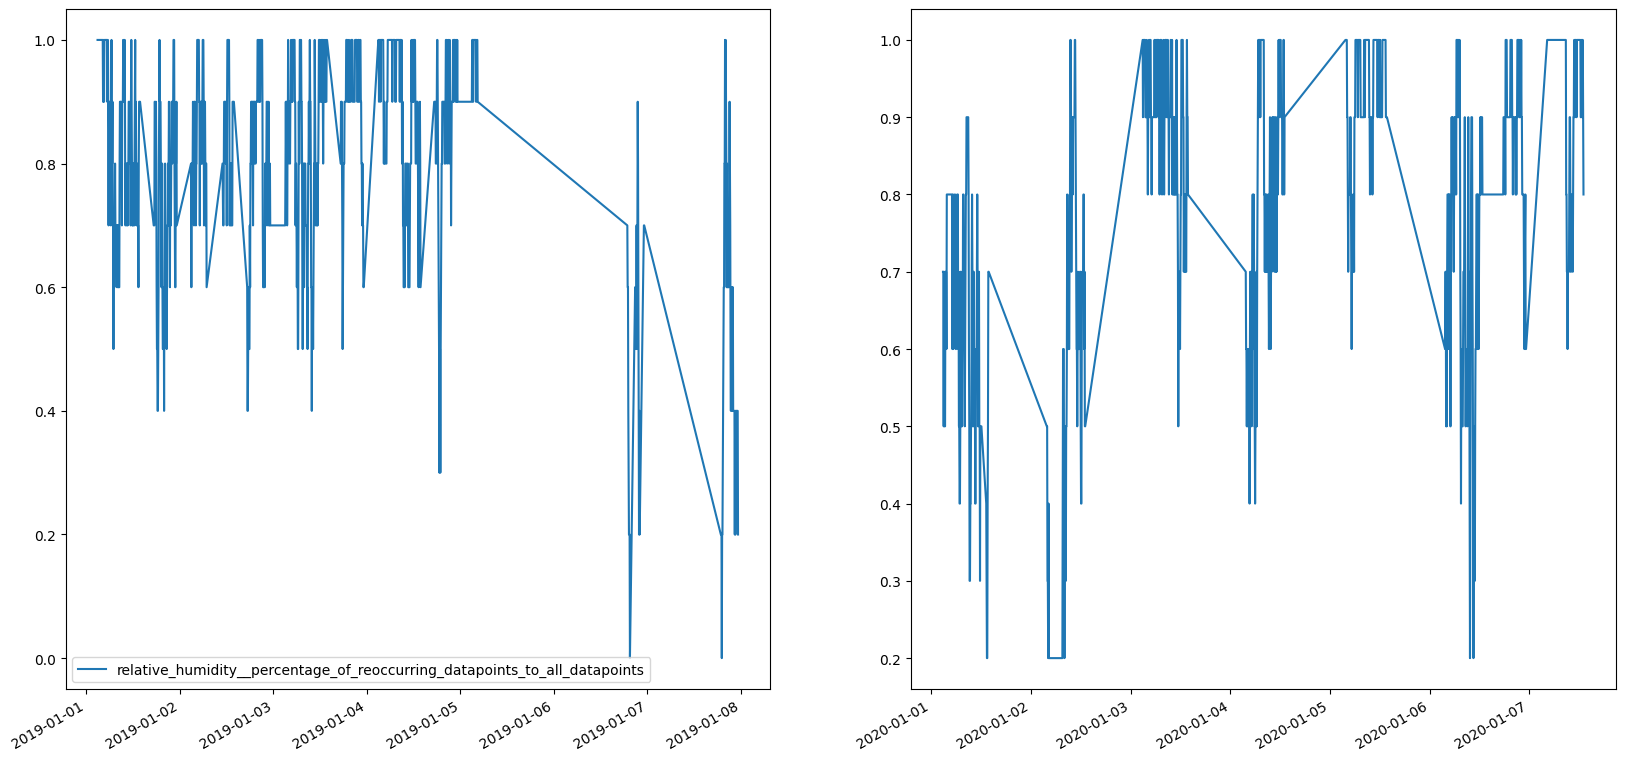

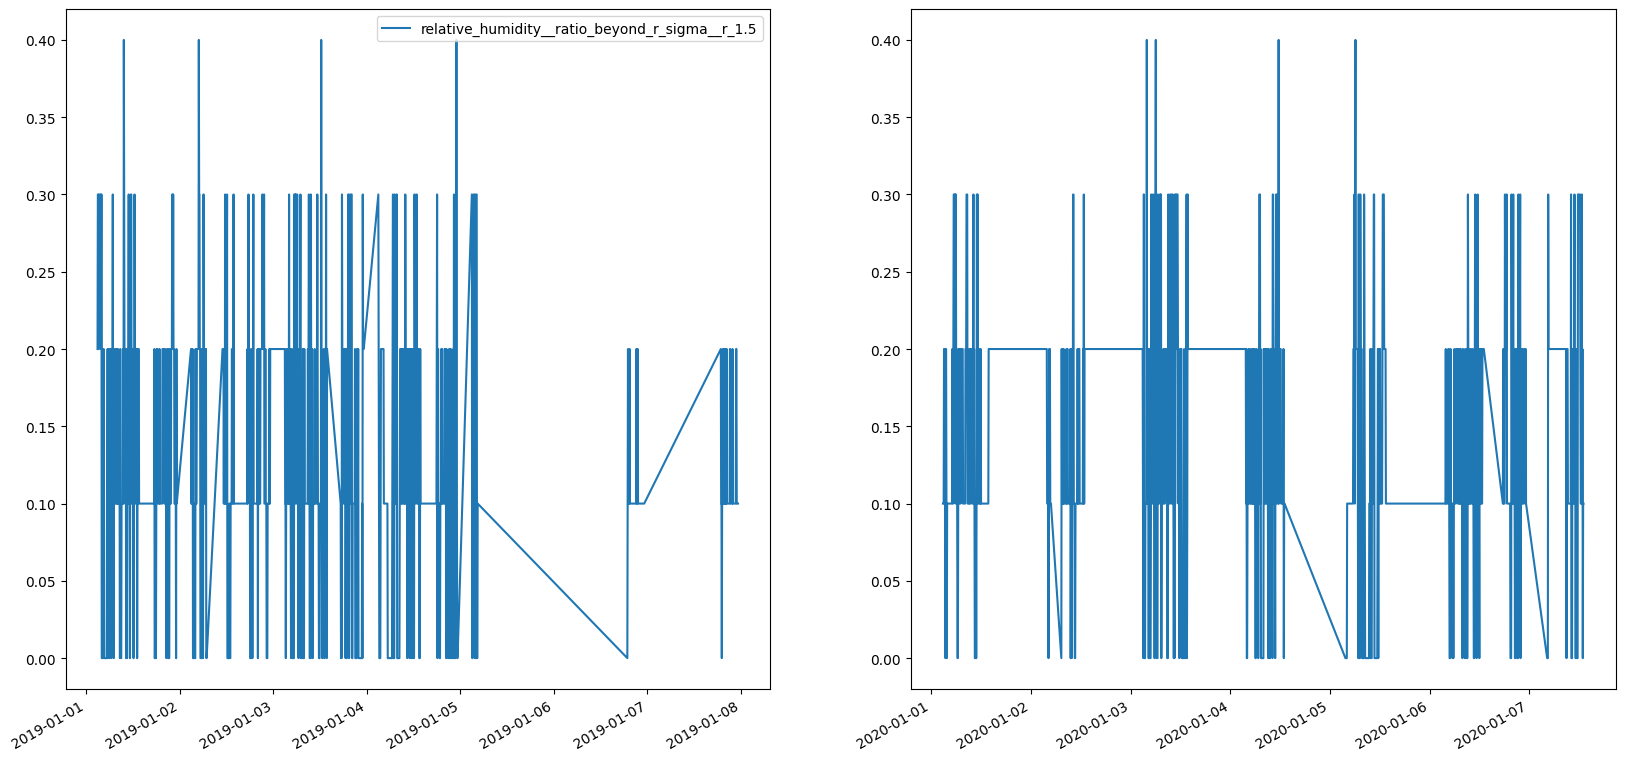

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
mloc_extracted_df.loc[mask_2019,'r0_10T'].plot(ax=ax[0], label='r0_10T', color='r')
mloc_extracted_df.loc[mask_2020,'r0_10T'].plot(ax=ax[1], label='r0_10T', color='r')

mask_2019 = mloc_extracted_df_cols_randsamp.index < '2020-01-01'
mask_2020 = mloc_extracted_df_cols_randsamp.index >= '2020-01-01'
for col in mloc_extracted_df_cols_randsamp.columns:
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    mloc_extracted_df_cols_randsamp.loc[mask_2019,col].plot(ax=ax[0], label=col)
    mloc_extracted_df_cols_randsamp.loc[mask_2020,col].plot(ax=ax[1], label=col)
    ax[0].legend()
